In [ ]:
# Installing and Importing necessary libraries

In [ ]:
from google.colab import drive  # For mounting Google Drive in Colab
import zipfile  # For extracting ZIP files
import os  # For file and directory operations
import shutil  # For file and directory management
import hashlib  # For generating file hashes
from collections import defaultdict  # For organizing data structures


In [ ]:
import matplotlib.pyplot as plt  # For creating plots and visualizations
import random  # For random sampling
from PIL import Image  # For image handling


In [ ]:
!pip install -U scikit-image  # Install the latest version of scikit-image
!pip uninstall scikit-image -y  # Uninstall scikit-image
!pip install scikit-image==0.18.3  # Install a specific version of scikit-image


Found existing installation: scikit-image 0.24.0
Uninstalling scikit-image-0.24.0:
  Successfully uninstalled scikit-image-0.24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 57.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.9 MB/s eta 0:00:00
  Created wheel for scikit-image: filename=scikit_image-0.18.3-cp310-cp310-linux_x86_64.whl size=36001497 sha256=133917ae8f73ecd94ba184ac2009dcbaabbbc9d0276b5f6fe4a5df52c6252a53
  Stored in directory: /root/.cache/pip/wheels/9d/55/80/c5bf730bc10906b1518cd6ebc05c87e69d1c46099ebdc9f59f
Successfully built scikit-image


In [ ]:
import cv2  # For image processing
import numpy as np  # For numerical operations and arrays
from tensorflow.keras.utils import load_img  # For loading images
from tensorflow.keras.utils import img_to_array  # For converting images to arrays
from skimage.feature import greycomatrix, greycoprops  # For GLCM texture feature extraction


In [ ]:
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets
from sklearn.preprocessing import StandardScaler  # For data normalization
from sklearn.metrics import silhouette_score, accuracy_score, classification_report  # For evaluation metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering  # For clustering techniques
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.manifold import TSNE  # For data visualization


In [ ]:
from tensorflow.keras.applications import ResNet50  # For feature extraction using ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input  # For preprocessing images for ResNet50


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # For Random Forest classification
from sklearn.svm import SVC  # For Support Vector Machine classification
from xgboost import XGBClassifier  # For XGBoost classification


In [ ]:
from tqdm import tqdm  # For progress bars during loops


In [ ]:
import pandas as pd  # For working with tabular data


In [ ]:
# Mounting the dataset from google drive

In [ ]:

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# EDA

In [ ]:

# Path to the zipped file and the extraction folder
zip_file_path = '/content/drive/My Drive/archive (28).zip'
extract_to_path = '/content/drive/My Drive/dataset_folder'

# Check if the dataset is already extracted
if not os.path.exists(extract_to_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
    print("Dataset extracted successfully!")
else:
    print("Dataset folder already exists. Skipping extraction.")

# Verify the dataset folder exists
if os.path.exists(extract_to_path):
    print(f"Dataset is ready at: {extract_to_path}")
else:
    print("Error: Dataset folder not found. Please check your paths.")


Dataset folder already exists. Skipping extraction.
Dataset is ready at: /content/drive/My Drive/dataset_folder


In [ ]:


# Path to the extracted dataset
dataset_path = '/content/drive/My Drive/dataset_folder'

# Walk through the dataset folder
print("Dataset Contents:\n" + "-" * 50)
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {len(dirs)} found")
    print(f"Files: {len(files)} found (showing first 5)")
    print(f"Sample Files: {files[:5]}")  # Show only the first 5 files
    print("-" * 50)


Dataset Contents:
--------------------------------------------------
Directory: /content/drive/My Drive/dataset_folder
Subdirectories: 5 found
Files: 1 found (showing first 5)
Sample Files: ['agglo_cluster_labels.npy']
--------------------------------------------------
Directory: /content/drive/My Drive/dataset_folder/imgs
Subdirectories: 131 found
Files: 0 found (showing first 5)
Sample Files: []
--------------------------------------------------
Directory: /content/drive/My Drive/dataset_folder/imgs/volume_0
Subdirectories: 0 found
Files: 0 found (showing first 5)
Sample Files: []
--------------------------------------------------
Directory: /content/drive/My Drive/dataset_folder/imgs/volume_1
Subdirectories: 0 found
Files: 0 found (showing first 5)
Sample Files: []
--------------------------------------------------
Directory: /content/drive/My Drive/dataset_folder/imgs/volume_10
Subdirectories: 0 found
Files: 0 found (showing first 5)
Sample Files: []
-------------------------------

In [ ]:



# Path to the parent directory containing all volume folders
source_parent_folder = '/content/drive/My Drive/dataset_folder/imgs'

# Path to the consolidated destination folder
destination_folder = '/content/drive/My Drive/dataset_folder/all_images'

# Check if images are already in the destination folder
if len(os.listdir(destination_folder)) > 0:  # Check if the folder is not empty
    print("Images are already loaded in the destination folder. Skipping transfer.")
else:
    # Create the destination folder if it doesn't already exist
    os.makedirs(destination_folder, exist_ok=True)

    # Loop through all volume folders and move images
    for root, dirs, files in os.walk(source_parent_folder):
        for file in files:
            # Check if the file is an image
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                source_file_path = os.path.join(root, file)

                # Ensure unique filenames by appending a counter if the file already exists
                file_base, file_ext = os.path.splitext(file)
                counter = 1
                destination_file_path = os.path.join(destination_folder, file)
                while os.path.exists(destination_file_path):
                    destination_file_path = os.path.join(destination_folder, f"{file_base}_{counter}{file_ext}")
                    counter += 1

                # Move the file to the destination folder
                shutil.move(source_file_path, destination_file_path)

    print("All images have been consolidated into one folder successfully!")


Images are already loaded in the destination folder. Skipping transfer.


In [ ]:


# Paths to the train, validation, test, and all_images folders
train_folder = '/content/drive/My Drive/dataset_folder/train'
valid_folder = '/content/drive/My Drive/dataset_folder/valid'
test_folder = '/content/drive/My Drive/dataset_folder/test'
all_images_folder = '/content/drive/My Drive/dataset_folder/all_images'

# Ensure the all_images folder exists
os.makedirs(all_images_folder, exist_ok=True)

# Move images from train, valid, and test back to all_images
for folder in [train_folder, valid_folder, test_folder]:
    if os.path.exists(folder):
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file)
            dest_path = os.path.join(all_images_folder, file)

            # Handle duplicates by renaming files if necessary
            counter = 1
            while os.path.exists(dest_path):
                name, ext = os.path.splitext(file)
                dest_path = os.path.join(all_images_folder, f"{name}_{counter}{ext}")
                counter += 1

            # Move the file
            shutil.move(file_path, dest_path)

        print(f"Moved all images from {folder} to {all_images_folder}")

# Optional: Delete the now-empty train, valid, and test folders
for folder in [train_folder, valid_folder, test_folder]:
    if os.path.exists(folder) and not os.listdir(folder):  # Check if folder is empty
        os.rmdir(folder)
        print(f"Deleted empty folder: {folder}")

print("All images have been restored to the all_images folder.")


All images have been restored to the all_images folder.


In [ ]:


# Path to the consolidated folder
destination_folder = '/content/drive/My Drive/dataset_folder/all_images'

# Check if the folder exists
if os.path.exists(destination_folder):
    # Count the number of images
    image_count = len([file for file in os.listdir(destination_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
    if image_count > 0:
        print(f"Total number of images in the folder: {image_count}")
    else:
        print("No images found in the folder.")
else:
    print(f"The folder '{destination_folder}' does not exist. Please check the path.")


Total number of images in the folder: 19261


In [ ]:

# Path to the consolidated folder
folder_path = '/content/drive/My Drive/dataset_folder/all_images'
log_file_path = os.path.join(folder_path, "duplicates_removed.log")  # Log file to track duplicate removal

# Function to calculate the hash of a file
def calculate_hash(file_path):
    with open(file_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

# Check if duplicates were already removed
if os.path.exists(log_file_path):
    print("Duplicate removal already performed. Skipping this step.")
else:
    print("Checking for duplicates...")

    # Dictionary to store file hashes and their paths
    hash_dict = defaultdict(list)

    # Check all images in the folder
    for file in os.listdir(folder_path):
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            file_path = os.path.join(folder_path, file)
            file_hash = calculate_hash(file_path)
            hash_dict[file_hash].append(file_path)

    # Find duplicates
    duplicates = {hash: paths for hash, paths in hash_dict.items() if len(paths) > 1}

    print(f"Total images checked: {len(hash_dict)}")
    print(f"Number of duplicate sets found: {len(duplicates)}")

    # Remove duplicates and write to log
    if duplicates:
        with open(log_file_path, 'w') as log_file:
            for hash_val, paths in duplicates.items():
                print(f"Removing duplicates for hash: {hash_val}")
                for path in paths[1:]:  # Keep the first file, remove others
                    os.remove(path)
                    log_file.write(f"Removed: {path}\n")
        print("Duplicate removal complete.")
    else:
        print("No duplicates found.")

    # Create an empty log file if no duplicates were found
    if not duplicates:
        with open(log_file_path, 'w') as log_file:
            log_file.write("No duplicates found.\n")

print("Process complete!")


Duplicate removal already performed. Skipping this step.
Process complete!


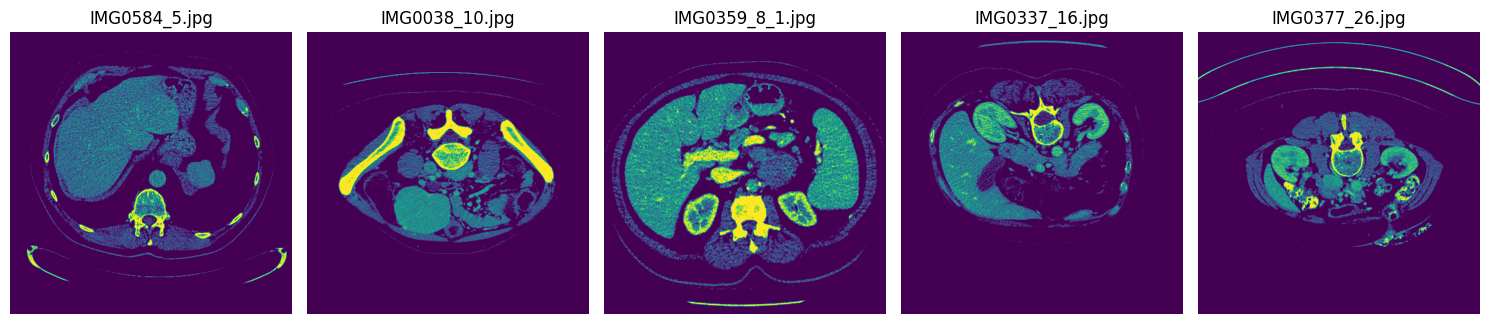

In [ ]:

# Path to the consolidated folder
source_folder = '/content/drive/My Drive/dataset_folder/all_images'

# Get all image file paths
all_images = [os.path.join(source_folder, img) for img in os.listdir(source_folder) if img.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Check if there are enough images to display
if len(all_images) < 5:
    print(f"Not enough images to display! Only {len(all_images)} images found.")
else:
    # Randomly select 5 images
    random_images = random.sample(all_images, 5)

    # Display the selected images
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(image_path))
        img.close()
    plt.tight_layout()
    plt.show()


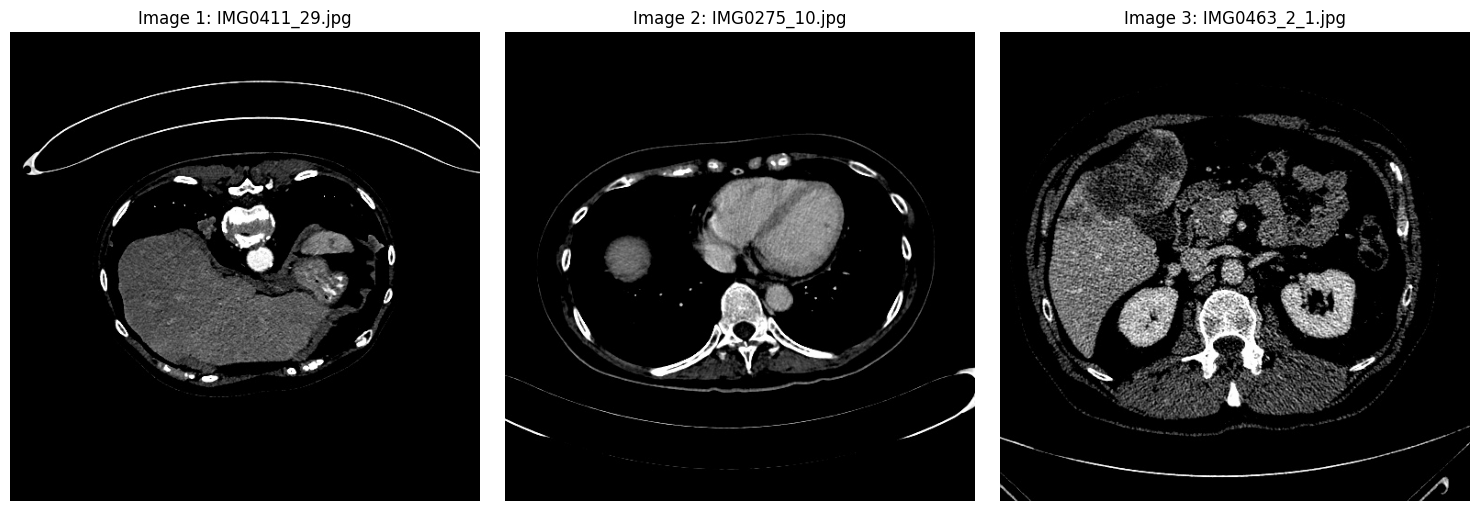

In [ ]:

# Path to the consolidated folder
source_folder = '/content/drive/My Drive/dataset_folder/all_images'

# Get all image file paths
all_images = [os.path.join(source_folder, img) for img in os.listdir(source_folder) if img.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Randomly select 3 images
random_images = random.sample(all_images, 3)

# Display the selected images
plt.figure(figsize=(15, 5))
for i, image_path in enumerate(random_images):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 3, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Image {i+1}: {os.path.basename(image_path)}")

plt.tight_layout()
plt.show()


In [ ]:

# Path to the consolidated folder
source_folder = '/content/drive/My Drive/dataset_folder/all_images'

# Get all image file paths
all_images = [os.path.join(source_folder, img) for img in os.listdir(source_folder) if img.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Optionally split the data dynamically (without moving files)
train_images, test_images = train_test_split(all_images, test_size=0.3, random_state=42)
valid_images, test_images = train_test_split(test_images, test_size=0.33, random_state=42)

print(f"Total images: {len(all_images)}")
print(f"Training images: {len(train_images)}")
print(f"Validation images: {len(valid_images)}")
print(f"Testing images: {len(test_images)}")


Total images: 19261
Training images: 13482
Validation images: 3871
Testing images: 1908


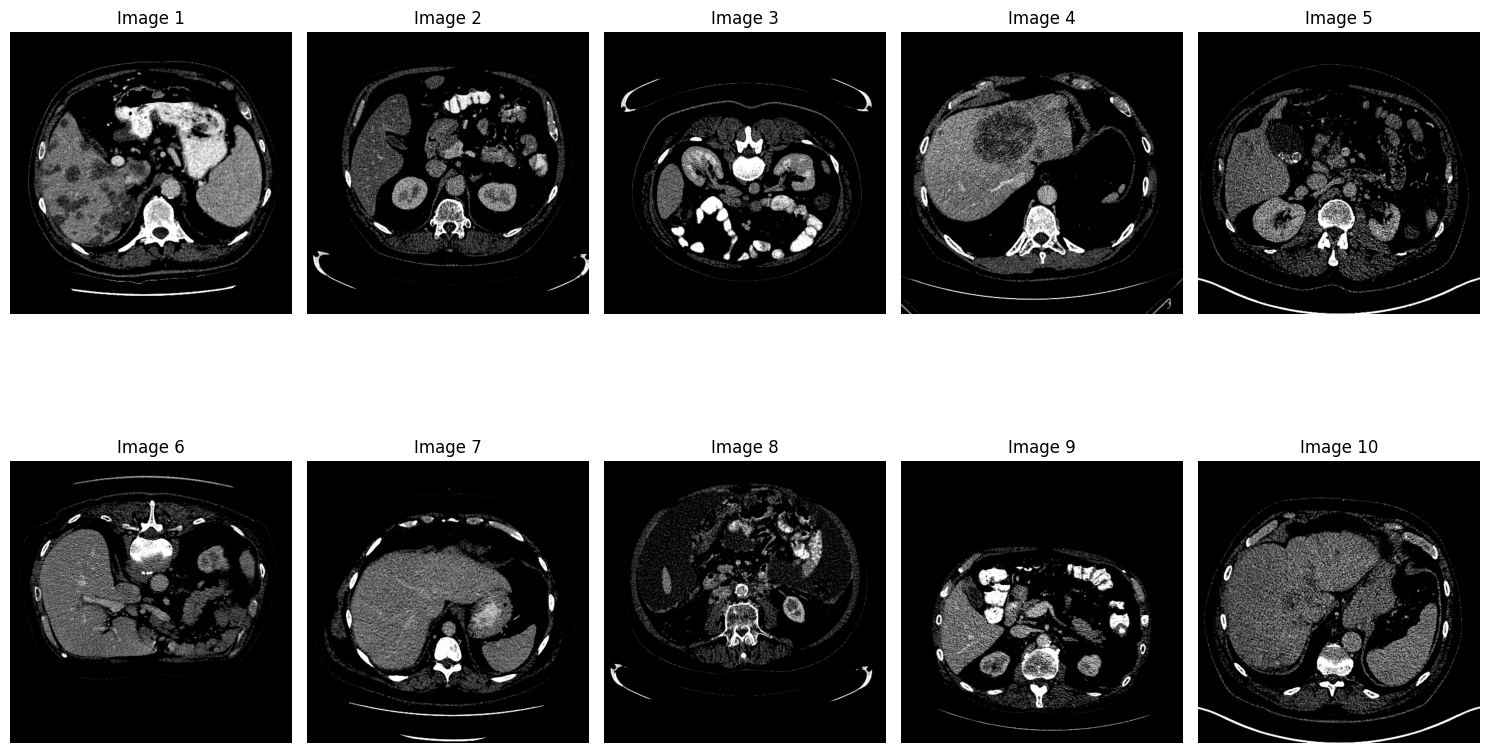

In [ ]:

# Randomly select 10 images to display
random_images = random.sample(all_images, 10)

plt.figure(figsize=(15, 10))
for i, image_path in enumerate(random_images):
    img = load_img(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()


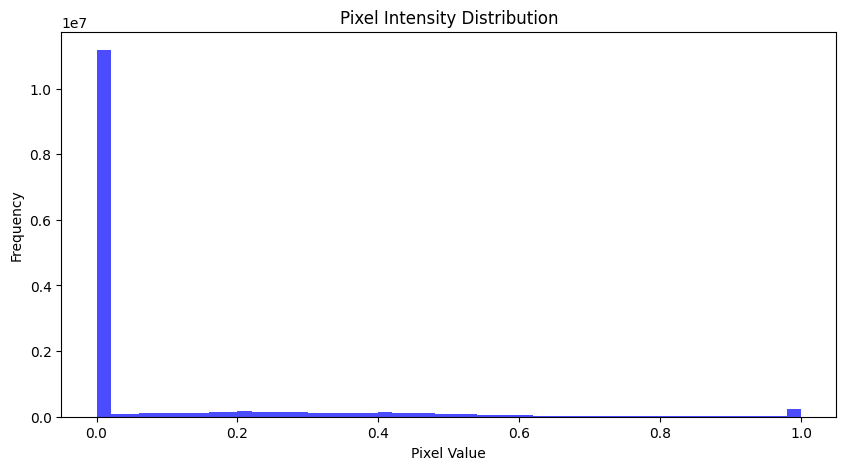

In [ ]:

# Select 100 random images for pixel intensity analysis
sample_images = random.sample(all_images, 100)

# Gather pixel intensities
pixel_values = []
for img_path in sample_images:
    img = load_img(img_path, target_size=(224, 224))  # Resize for consistency
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    pixel_values.extend(img_array.flatten())  # Flatten the array and collect values

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# DATA PREPARATION

In [ ]:

# Input directory containing all images
source_folder = "/content/drive/My Drive/dataset_folder/all_images"

# Output directory to save .npy files
output_dir = "/content/drive/My Drive/dataset_folder/preprocessed_data"
os.makedirs(output_dir, exist_ok=True)

# Image processing parameters
image_size = (224, 224)  # Resize all images to 224x224
batch_size = 500  # Number of images per batch

# Step 1: Get all image file paths
all_images = sorted([os.path.join(source_folder, img) for img in os.listdir(source_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])

# Step 2: Check existing .npy files
existing_batches = [file for file in os.listdir(output_dir) if file.startswith('batch_') and file.endswith('.npy')]
existing_batches.sort()  # Sort to maintain order
print(f"Existing .npy files: {len(existing_batches)}")

# Determine already processed images
processed_images = len(existing_batches) * batch_size
if processed_images >= len(all_images):
    print("All images are already processed. No further action required.")
else:
    print(f"Some images are already processed. Resuming from image index {processed_images}...")

# Step 3: Process only unprocessed images
start_idx = processed_images
for i in tqdm(range(start_idx, len(all_images), batch_size), desc="Processing batches"):
    batch_images = all_images[i:i + batch_size]
    batch_data = []
    for img_path in batch_images:
        try:
            img = load_img(img_path, target_size=image_size)  # Load and resize image
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            batch_data.append(img_array)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping. Error: {e}")

    if batch_data:
        # Save the batch as an .npy file
        batch_file = os.path.join(output_dir, f"batch_{len(existing_batches) + 1}.npy")
        np.save(batch_file, np.array(batch_data))
        print(f"Saved batch {len(existing_batches) + 1} to {batch_file}")
        existing_batches.append(batch_file)  # Update processed batches

# Step 4: Count total .npy files
batch_files_only = [file for file in os.listdir(output_dir) if file.startswith('batch_') and file.endswith('.npy')]
total_npy_files = len(batch_files_only)
print(f"Total .npy files saved: {total_npy_files}")


Existing .npy files: 39
All images are already processed. No further action required.


Processing batches: 0it [00:00, ?it/s]

Total .npy files saved: 39


In [ ]:

# Define the main preprocessed data directory
output_dir = "/content/drive/My Drive/dataset_folder/preprocessed_data"

# Define subfolders for train, valid, and test
subfolders = ["train", "valid", "test"]

# Step 1: Check and move files from subfolders to the main directory
for subfolder in subfolders:
    subfolder_path = os.path.join(output_dir, subfolder)
    if os.path.exists(subfolder_path):
        print(f"Processing folder: {subfolder_path}")

        # Move .npy files to the main directory
        for file in os.listdir(subfolder_path):
            if file.endswith('.npy'):
                src_path = os.path.join(subfolder_path, file)
                dst_path = os.path.join(output_dir, file)

                # Handle duplicate filenames
                counter = 1
                while os.path.exists(dst_path):
                    name, ext = os.path.splitext(file)
                    dst_path = os.path.join(output_dir, f"{name}_{counter}{ext}")
                    counter += 1

                shutil.move(src_path, dst_path)
                print(f"Moved: {src_path} -> {dst_path}")

        # Delete the subfolder after moving files
        os.rmdir(subfolder_path)
        print(f"Deleted folder: {subfolder_path}")

# Step 2: Verify all .npy files are now in the main directory
npy_files = [file for file in os.listdir(output_dir) if file.endswith('.npy')]
print(f"Total .npy files in {output_dir}: {len(npy_files)}")


Total .npy files in /content/drive/My Drive/dataset_folder/preprocessed_data: 41


In [ ]:

output_dir = "/content/drive/My Drive/dataset_folder/preprocessed_data"

saved_files = os.listdir(output_dir)
print(f"Total saved files: {len(saved_files)}")
print(saved_files[:10])  # Display first 10 files for verification


Total saved files: 41
['batch_6.npy', 'batch_7.npy', 'batch_8.npy', 'batch_9.npy', 'batch_10.npy', 'batch_11.npy', 'batch_12.npy', 'batch_13.npy', 'batch_14.npy', 'batch_15.npy']


In [ ]:

# Path to preprocessed data
output_dir = "/content/drive/My Drive/dataset_folder/preprocessed_data"

# List all files
saved_files = sorted(os.listdir(output_dir))  # Sort for better visibility
print("Saved files:")
for file in saved_files:
    print(file)


Saved files:
batch_1.npy
batch_10.npy
batch_11.npy
batch_12.npy
batch_13.npy
batch_14.npy
batch_15.npy
batch_16.npy
batch_17.npy
batch_18.npy
batch_19.npy
batch_2.npy
batch_20.npy
batch_21.npy
batch_22.npy
batch_23.npy
batch_24.npy
batch_25.npy
batch_26.npy
batch_27.npy
batch_28.npy
batch_29.npy
batch_3.npy
batch_30.npy
batch_31.npy
batch_32.npy
batch_33.npy
batch_34.npy
batch_35.npy
batch_36.npy
batch_37.npy
batch_38.npy
batch_39.npy
batch_4.npy
batch_5.npy
batch_6.npy
batch_7.npy
batch_8.npy
batch_9.npy
cluster_labels.npy
resnet_features.npy


In [ ]:

# Path to preprocessed data
output_dir = "/content/drive/My Drive/dataset_folder/preprocessed_data"

# List all .npy files
npy_files = [os.path.join(output_dir, file) for file in os.listdir(output_dir) if file.endswith('.npy')]

# Check shapes and contents of the first few batches
for idx, npy_file in enumerate(npy_files[:3]):  # Check first 3 batches
    batch_data = np.load(npy_file)
    print(f"Batch {idx + 1}: {npy_file}")
    print(f"Shape: {batch_data.shape}")


Batch 1: /content/drive/My Drive/dataset_folder/preprocessed_data/batch_6.npy
Shape: (500, 224, 224, 3)
Batch 2: /content/drive/My Drive/dataset_folder/preprocessed_data/batch_7.npy
Shape: (500, 224, 224, 3)
Batch 3: /content/drive/My Drive/dataset_folder/preprocessed_data/batch_8.npy
Shape: (500, 224, 224, 3)


In [ ]:

# Directory containing the .npy files
npy_folder = "/content/drive/My Drive/dataset_folder/preprocessed_data"

# Filter only the batch files
npy_files = sorted(
    [os.path.join(npy_folder, file) for file in os.listdir(npy_folder)
     if file.startswith('batch_') and file.endswith('.npy')]
)

print(f"Found {len(npy_files)} batch files for combining.")

# Combine all batches into one dataset
combined_data = []
for npy_file in npy_files:
    batch_data = np.load(npy_file)
    combined_data.append(batch_data)

combined_data = np.concatenate(combined_data, axis=0)
print(f"Combined dataset shape: {combined_data.shape}")


Found 39 batch files for combining.
Combined dataset shape: (19261, 224, 224, 3)


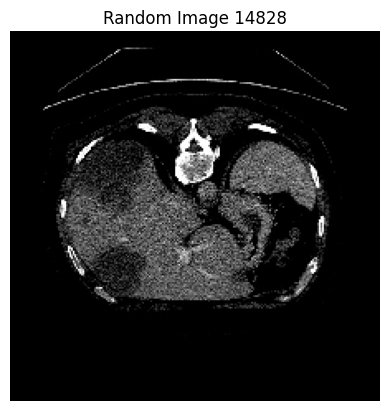

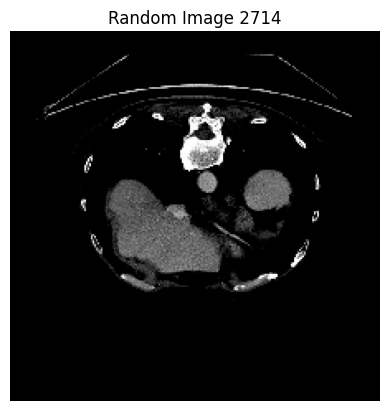

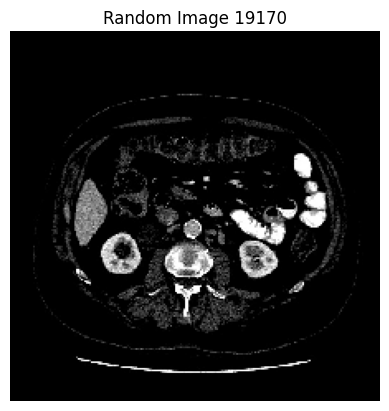

In [ ]:

for _ in range(3):  # Display 3 random images
    random_idx = random.randint(0, combined_data.shape[0] - 1)
    plt.imshow(combined_data[random_idx])
    plt.axis('off')
    plt.title(f"Random Image {random_idx}")
    plt.show()


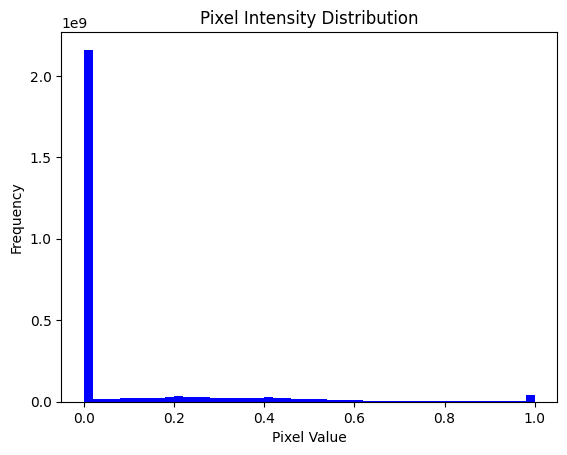

In [ ]:

pixel_values = combined_data.flatten()
plt.hist(pixel_values, bins=50, color='blue')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# CLUSTERING ANALYSIS

In [ ]:

# Flatten images for clustering
flat_data = combined_data.reshape(combined_data.shape[0], -1)  # Shape: (19261, 224*224*3)

# Apply KMeans clustering
num_clusters = 5  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(flat_data)

print(f"Cluster labels for all images: {labels}")


Cluster labels for all images: [0 3 3 ... 2 2 2]


Cluster Distribution: {0: 1534, 1: 5012, 2: 4283, 3: 5419, 4: 3013}


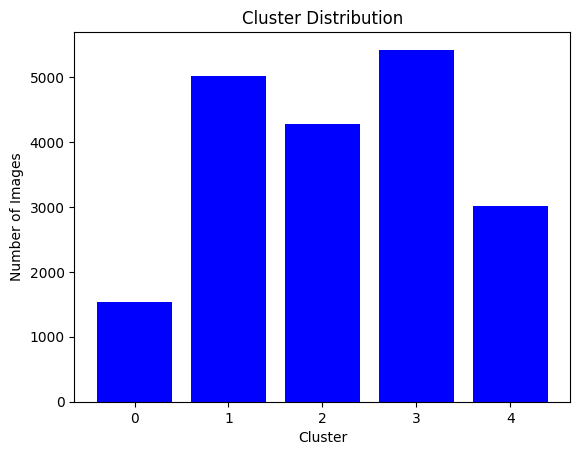

In [ ]:

# Count the number of images in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))

print("Cluster Distribution:", cluster_distribution)

# Visualize Agglomerative the distribution
plt.bar(cluster_distribution.keys(), cluster_distribution.values(), color='blue')
plt.xlabel("Cluster")
plt.ylabel("Number of Images")
plt.title("Cluster Distribution")
plt.xticks(range(len(cluster_distribution)))  # Ensure all clusters are labeled
plt.show()


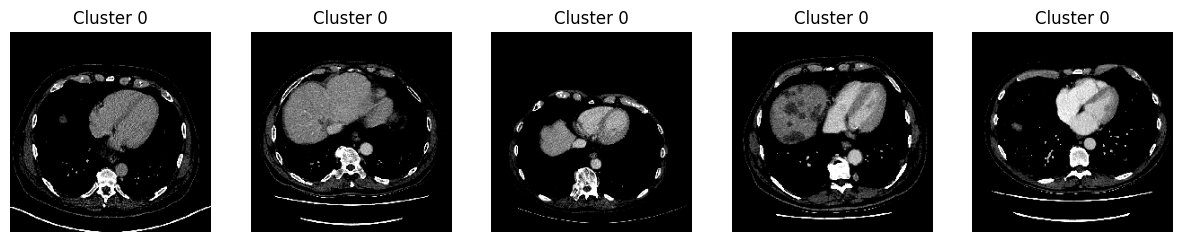

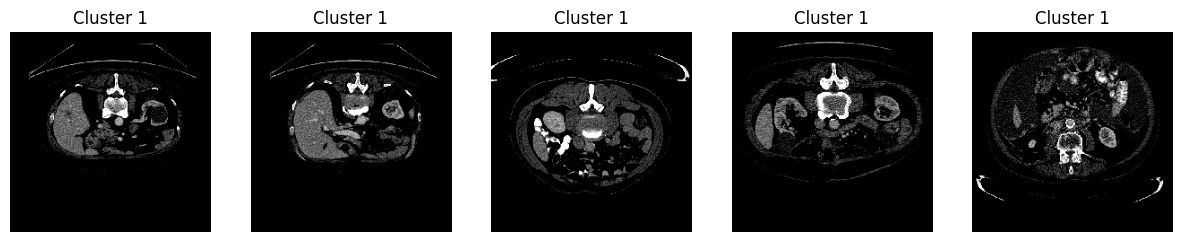

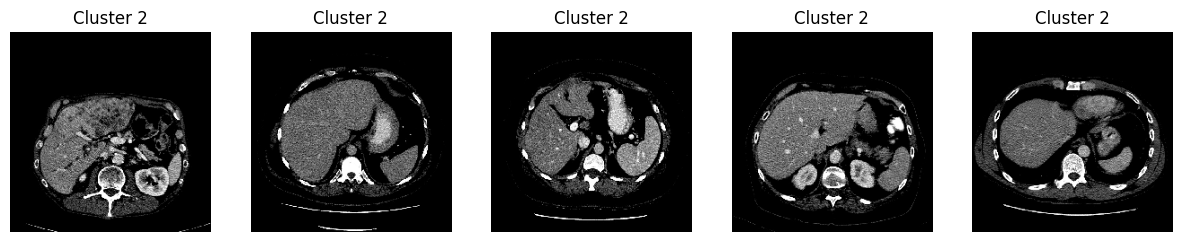

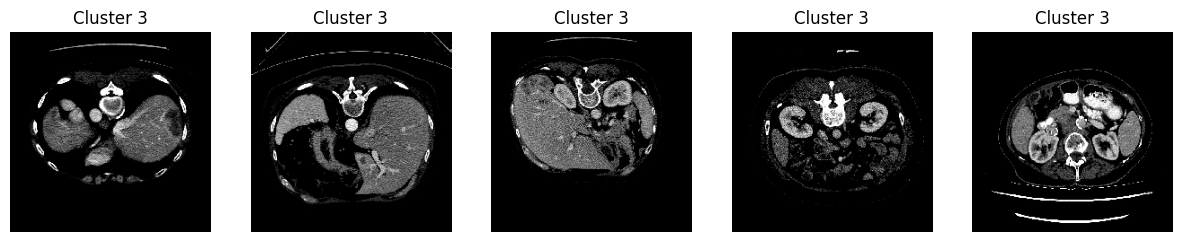

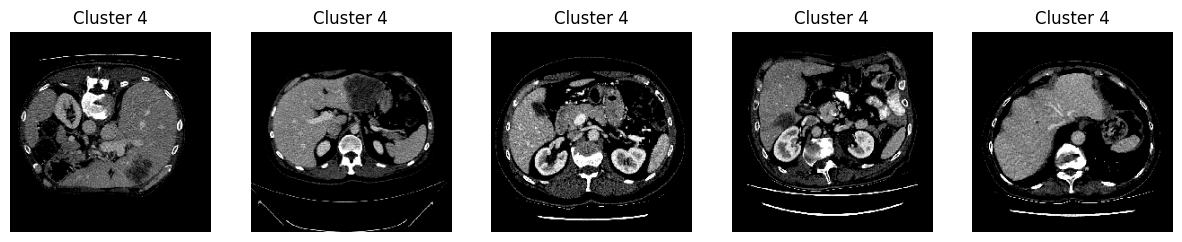

In [ ]:

# Visualize images from each cluster
num_images_per_cluster = 5  # Number of images to display per cluster
for cluster in unique:
    cluster_indices = np.where(labels == cluster)[0]
    random_images = random.sample(list(cluster_indices), min(num_images_per_cluster, len(cluster_indices)))

    plt.figure(figsize=(15, 5))
    for idx, image_idx in enumerate(random_images):
        plt.subplot(1, num_images_per_cluster, idx + 1)
        plt.imshow(combined_data[image_idx])
        plt.axis('off')
        plt.title(f"Cluster {cluster}")
    plt.show()


In [ ]:

# File path to save cluster labels
cluster_labels_file = "/content/drive/My Drive/dataset_folder/preprocessed_data/cluster_labels.npy"

# Check if the file already exists
if os.path.exists(cluster_labels_file):
    print(f"Cluster labels file already exists at: {cluster_labels_file}. No need to save again.")
else:
    # Save cluster labels
    np.save(cluster_labels_file, labels)
    print(f"Cluster labels saved at: {cluster_labels_file}")


Cluster labels file already exists at: /content/drive/My Drive/dataset_folder/preprocessed_data/cluster_labels.npy. No need to save again.


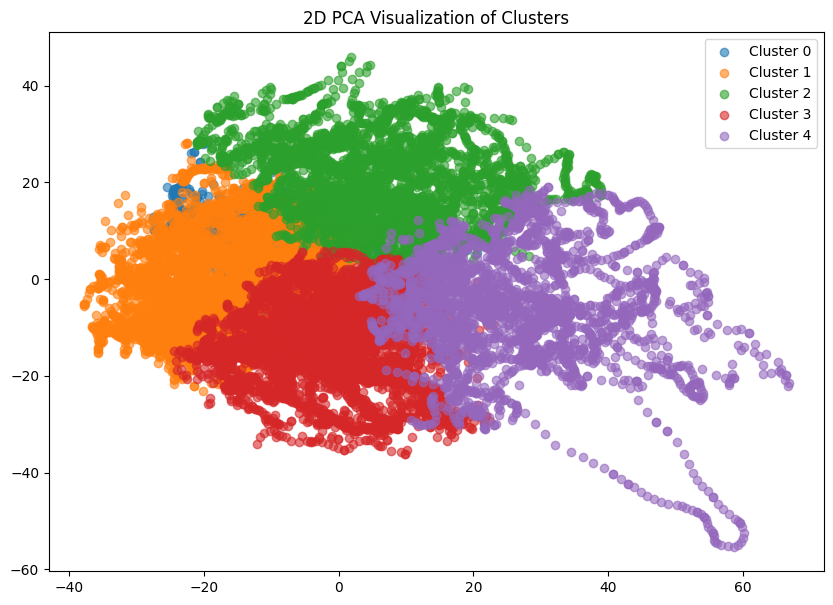

In [ ]:

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(flat_data)

# Plot the reduced data
plt.figure(figsize=(10, 7))
for cluster in unique:
    cluster_points = reduced_data[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.6)
plt.legend()
plt.title("2D PCA Visualization of Clusters")
plt.show()


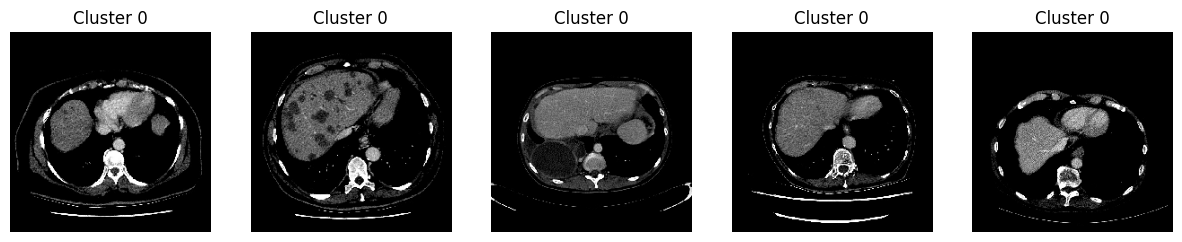

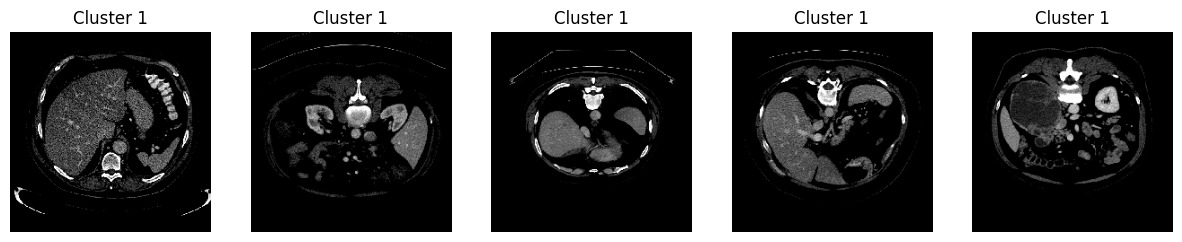

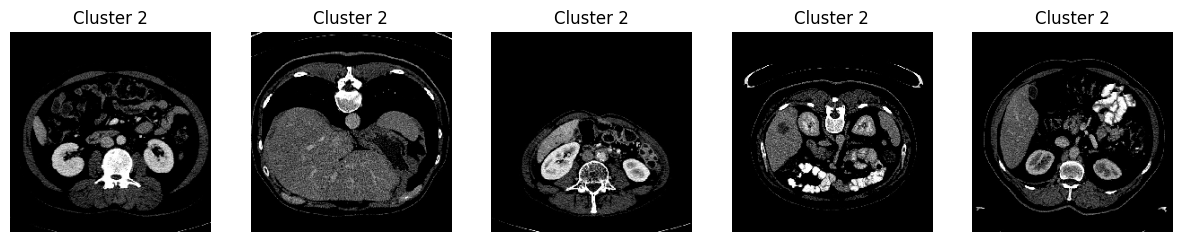

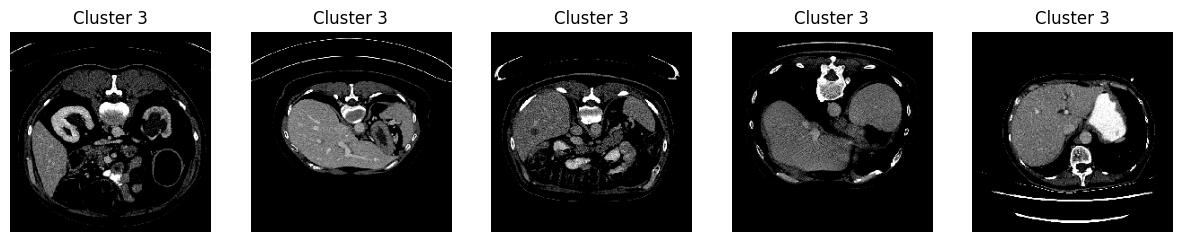

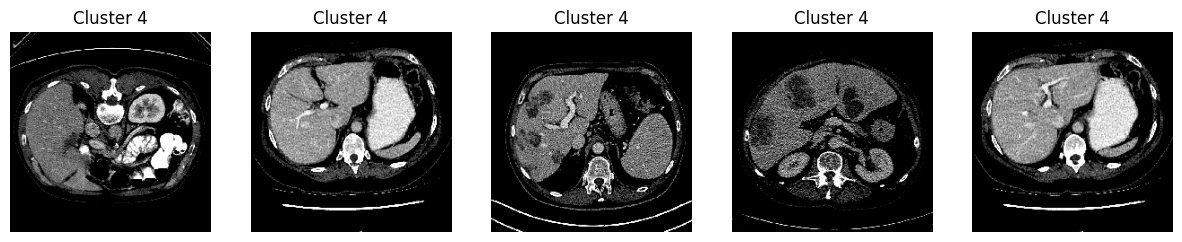

In [ ]:

# Number of clusters (already computed during clustering)
num_clusters = len(set(labels))

# Number of images to visualize per cluster
num_images_per_cluster = 5

# Visualize images from each cluster
for cluster in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(labels) if label == cluster]
    random_images = random.sample(cluster_indices, min(num_images_per_cluster, len(cluster_indices)))

    plt.figure(figsize=(15, 5))
    for idx, image_idx in enumerate(random_images):
        plt.subplot(1, num_images_per_cluster, idx + 1)
        plt.imshow(combined_data[image_idx])
        plt.axis('off')
        plt.title(f"Cluster {cluster}")
    plt.show()


In [ ]:
# RESNET FEATURE EXTRACTION

In [ ]:
# Load the ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')  # Global Average Pooling
print("ResNet50 model loaded successfully.")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ResNet50 model loaded successfully.


In [ ]:
def extract_features(image_paths, batch_size=100, image_size=(224, 224)):
    features = []
    for i in tqdm(range(0, len(image_paths), batch_size)):
        batch_paths = image_paths[i:i + batch_size]
        batch_images = []

        for path in batch_paths:
            # Load and preprocess each image
            img = load_img(path, target_size=image_size)
            img_array = img_to_array(img)
            img_array = preprocess_input(img_array)  # Preprocess for ResNet50
            batch_images.append(img_array)

        # Convert to numpy array and extract features
        batch_images = np.array(batch_images)
        batch_features = resnet_model.predict(batch_images)
        features.append(batch_features)

    return np.vstack(features)


In [ ]:


# Path to the consolidated folder
source_folder = '/content/drive/My Drive/dataset_folder/all_images'
resnet_features_path = "/content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy"

# Check if the features file already exists
if os.path.exists(resnet_features_path):
    print(f"Features file already exists at: {resnet_features_path}. No need to extract again.")
    # Load the existing features if needed
    features = np.load(resnet_features_path)
    print("Features loaded successfully.")
else:
    # List all images
    all_images = [os.path.join(source_folder, img) for img in os.listdir(source_folder)
                  if img.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

    # Extract features
    features = extract_features(all_images, batch_size=100)  # Replace with your feature extraction function

    # Save the features for future use
    np.save(resnet_features_path, features)
    print("Features extracted and saved successfully.")


Features file already exists at: /content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy. No need to extract again.
Features loaded successfully.


In [ ]:
# DBSCAN CLUSTERING

In [ ]:


# Path to ResNet features file
features_path = '/content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy'
resnet_features = np.load(features_path)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3, metric='euclidean')

dbscan_labels = dbscan.fit_predict(resnet_features)

# Evaluate clustering
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
silhouette_avg = silhouette_score(resnet_features, dbscan_labels) if num_clusters > 1 else "N/A"

print(f"Number of clusters: {num_clusters}")
print(f"Silhouette Score: {silhouette_avg}")


Number of clusters: 0
Silhouette Score: N/A


In [ ]:


# Path to the ResNet features file
features_path = '/content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy'

# Load the file
resnet_features = np.load(features_path)

# Print details about the file
print(f"Shape of ResNet features: {resnet_features.shape}")
print(f"Sample features (first row): {resnet_features[0]}")  # Show the first feature vector


Shape of ResNet features: (19261, 2048)
Sample features (first row): [1.2741535  0.9139683  0.58511806 ... 0.07312178 0.2065242  1.0716825 ]


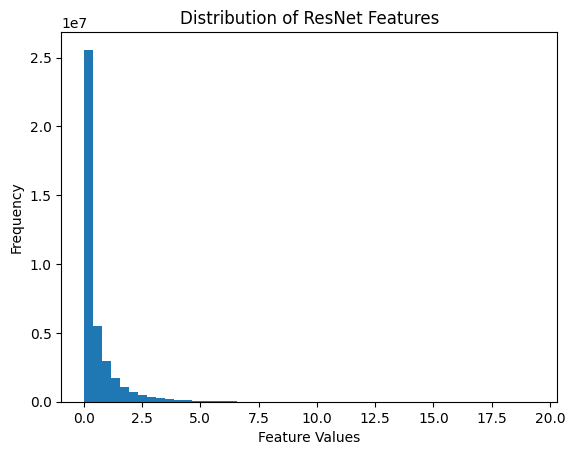

In [ ]:

plt.hist(resnet_features.ravel(), bins=50)
plt.title("Distribution of ResNet Features")
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.show()


In [ ]:

# Experiment with new DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=3, metric='euclidean')
dbscan_labels = dbscan.fit_predict(resnet_features)

num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters: {num_clusters}")


Number of clusters: 0


In [ ]:

# Reduce dimensions to 50 for better clustering
pca = PCA(n_components=50, random_state=42)
reduced_features = pca.fit_transform(resnet_features)

print(f"Reduced features shape: {reduced_features.shape}")


Reduced features shape: (19261, 50)


In [ ]:

# Apply DBSCAN on reduced features
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(reduced_features)

# Evaluate clustering
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
silhouette_avg = silhouette_score(reduced_features, dbscan_labels) if num_clusters > 1 else "N/A"

print(f"Number of clusters: {num_clusters}")
print(f"Silhouette Score: {silhouette_avg}")


Number of clusters: 0
Silhouette Score: N/A


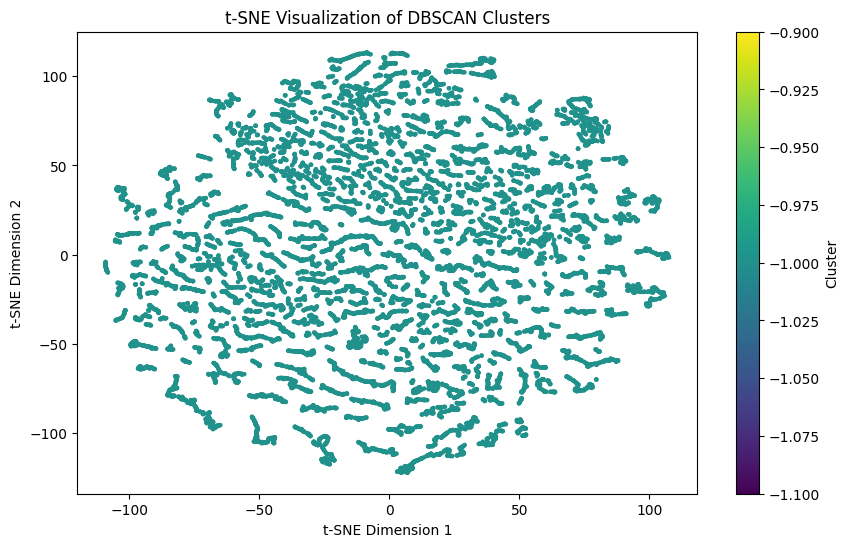

In [ ]:

# Perform t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(reduced_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=dbscan_labels, cmap='viridis', s=5)
plt.title("t-SNE Visualization of DBSCAN Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# AGGLOMERATIVE CLUSRTERING

In [ ]:

agglo = AgglomerativeClustering(n_clusters=5)  # Try with 5 clusters
agglo_labels = agglo.fit_predict(reduced_features)

num_clusters = len(set(agglo_labels))
print(f"Number of clusters: {num_clusters}")


Number of clusters: 5


In [ ]:

cluster_counts = np.unique(agglo_labels, return_counts=True)
print(f"Cluster counts: {dict(zip(cluster_counts[0], cluster_counts[1]))}")


Cluster counts: {0: 6108, 1: 3590, 2: 3672, 3: 2993, 4: 2898}


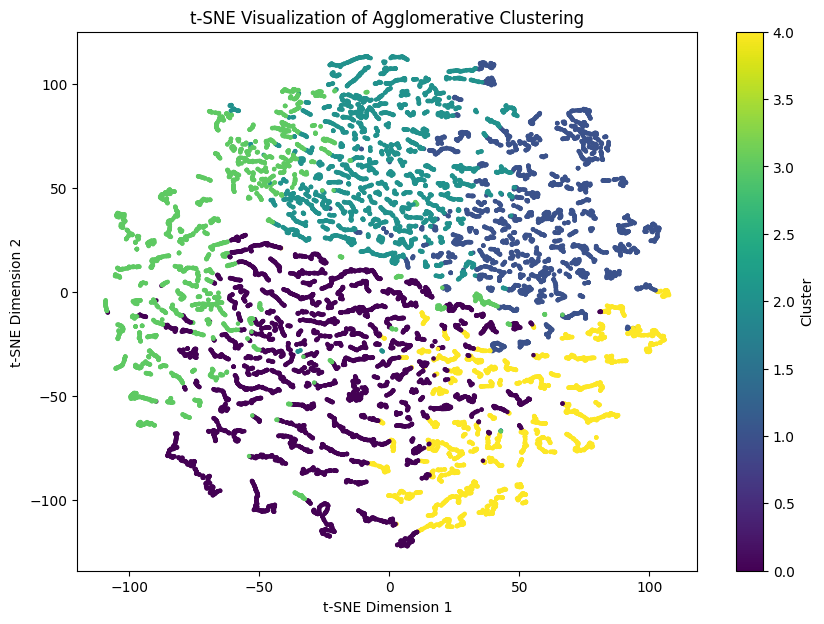

In [ ]:

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(reduced_features)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=agglo_labels, cmap='viridis', s=5)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Agglomerative Clustering")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [ ]:
for cluster in range(num_clusters):
    cluster_indices = np.where(agglo_labels == cluster)[0]
    print(f"Cluster {cluster} has {len(cluster_indices)} samples.")



Cluster 0 has 6108 samples.
Cluster 1 has 3590 samples.
Cluster 2 has 3672 samples.
Cluster 3 has 2993 samples.
Cluster 4 has 2898 samples.


In [ ]:

# Path to save the Agglomerative Cluster labels
agglo_labels_path = '/content/drive/My Drive/dataset_folder/agglo_cluster_labels.npy'

# Check if the cluster labels file already exists
if os.path.exists(agglo_labels_path):
    print(f"Agglo Cluster labels file already exists at: {agglo_labels_path}. No need to save again.")
    # Load the existing labels if needed
    agglo_labels = np.load(agglo_labels_path)
    print("Agglo Cluster labels loaded successfully.")
else:

    # Save the Agglomerative Cluster labels
    np.save(agglo_labels_path, agglo_labels)
    print("Agglo Cluster labels saved successfully.")


Agglo Cluster labels file already exists at: /content/drive/My Drive/dataset_folder/agglo_cluster_labels.npy. No need to save again.
Agglo Cluster labels loaded successfully.


Cluster 0:


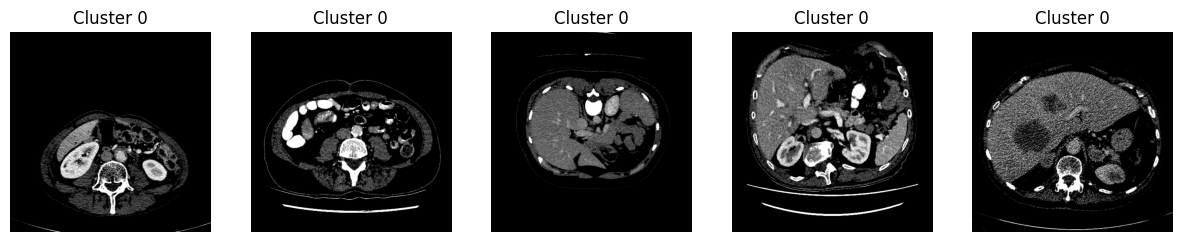

Cluster 1:


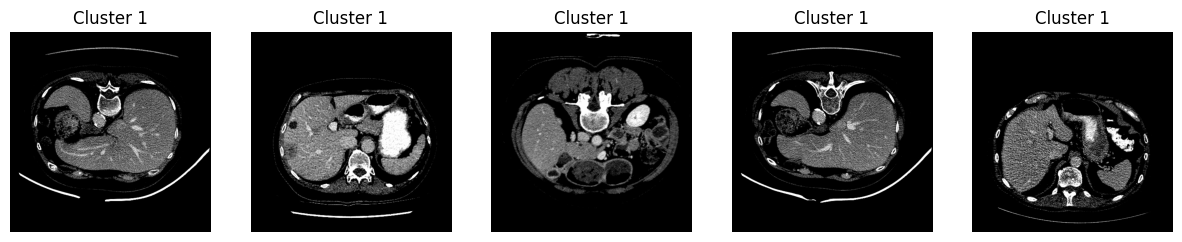

Cluster 2:


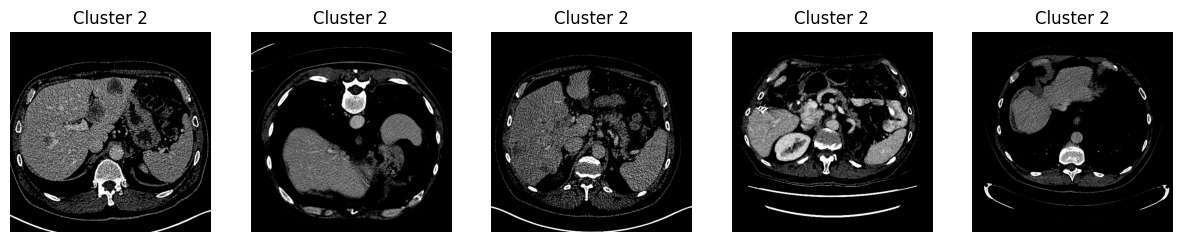

Cluster 3:


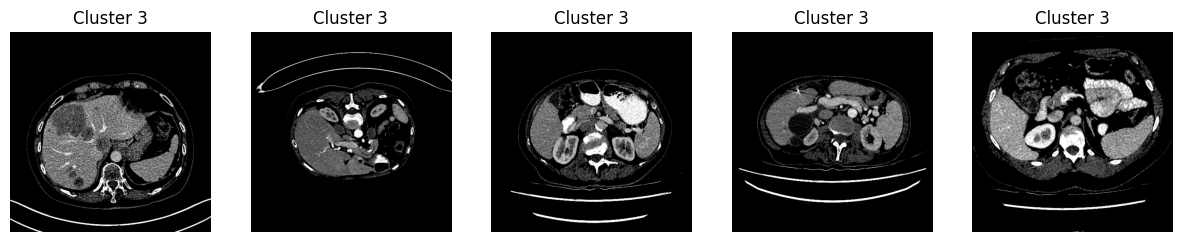

Cluster 4:


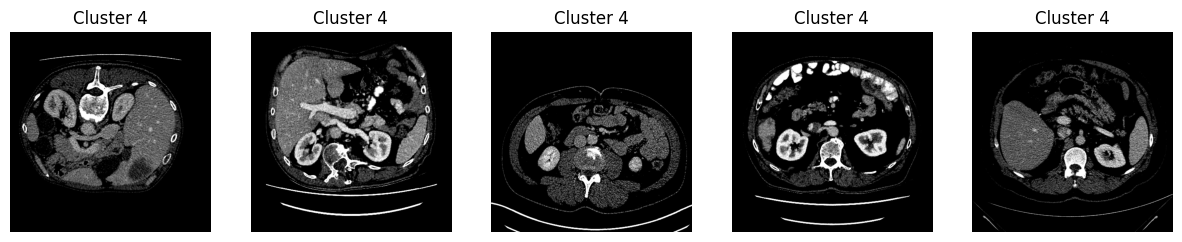

In [ ]:

# Define the path to the original images
all_images = sorted([os.path.join(source_folder, img) for img in os.listdir(source_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])

# Function to visualize original images from a specific cluster
def visualize_cluster_samples(cluster_label, n_samples=5):
    cluster_indices = np.where(agglo_labels == cluster_label)[0]  # Get indices of features in the cluster
    sample_indices = random.sample(list(cluster_indices), n_samples)  # Randomly select samples

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(sample_indices):
        original_image_path = all_images[idx]  # Map feature index back to original image
        img = load_img(original_image_path)  # Load the original image
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Cluster {cluster_label}")
    plt.show()

# Visualize samples for each cluster
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    visualize_cluster_samples(cluster)


Analyzing Cluster 0...
Analyzing Cluster 1...
Analyzing Cluster 2...
Analyzing Cluster 3...
Analyzing Cluster 4...

Cluster Statistics:
Cluster 0: {'Mean Intensity': 0.5243866, 'Variance': 0.83314896, 'Contrast': 14.216059}
Cluster 1: {'Mean Intensity': 0.53440845, 'Variance': 0.8707771, 'Contrast': 14.313267}
Cluster 2: {'Mean Intensity': 0.5233586, 'Variance': 0.84185016, 'Contrast': 14.031905}
Cluster 3: {'Mean Intensity': 0.5314547, 'Variance': 0.8619903, 'Contrast': 14.395565}
Cluster 4: {'Mean Intensity': 0.5276309, 'Variance': 0.84451556, 'Contrast': 14.215215}


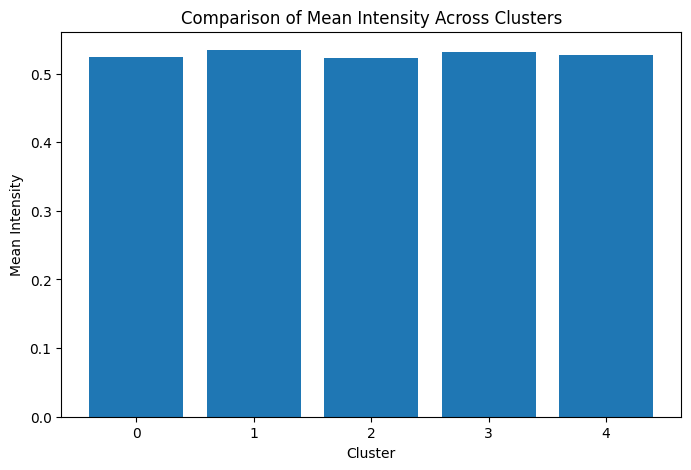

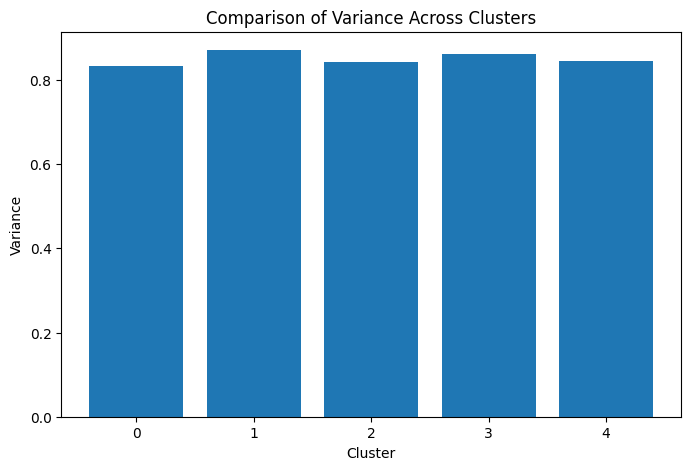

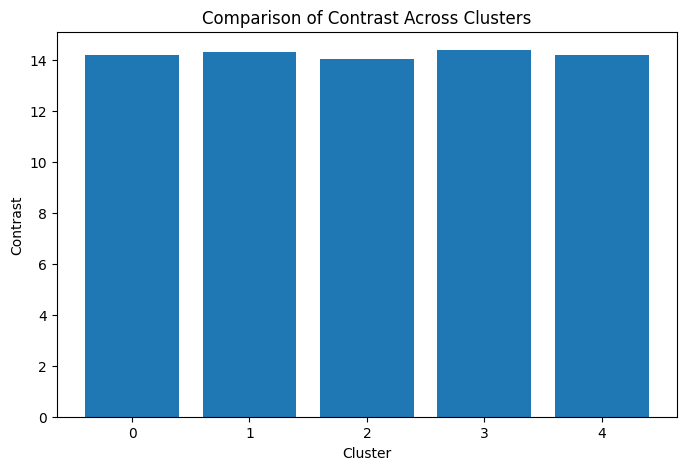

In [ ]:

# Load ResNet features and cluster labels
resnet_features_path = "/content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy"
cluster_labels_path = "/content/drive/My Drive/dataset_folder/preprocessed_data/cluster_labels.npy"


resnet_features = np.load(resnet_features_path)
cluster_labels = np.load(cluster_labels_path)

# Number of clusters
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Calculate statistics for each cluster
cluster_stats = {}
for cluster in range(num_clusters):
    print(f"Analyzing Cluster {cluster}...")
    indices = np.where(cluster_labels == cluster)[0]
    cluster_features = resnet_features[indices]

    # Calculate mean, variance, and contrast
    mean_intensity = np.mean(cluster_features, axis=1)
    variance = np.var(cluster_features, axis=1)
    contrast = np.max(cluster_features, axis=1) - np.min(cluster_features, axis=1)

    cluster_stats[cluster] = {
        "Mean Intensity": np.mean(mean_intensity),
        "Variance": np.mean(variance),
        "Contrast": np.mean(contrast)
    }

# Display results
print("\nCluster Statistics:")
for cluster, stats in cluster_stats.items():
    print(f"Cluster {cluster}: {stats}")

# Plot comparison for each statistic
for metric in ["Mean Intensity", "Variance", "Contrast"]:
    plt.figure(figsize=(8, 5))
    plt.bar(range(num_clusters), [cluster_stats[c][metric] for c in range(num_clusters)])
    plt.title(f"Comparison of {metric} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(metric)
    plt.show()


In [ ]:
#RESNET +KMEANS CLUSTER

In [ ]:

# Load ResNet features and cluster labels
resnet_features = np.load("/content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy")
cluster_labels = np.load("/content/drive/My Drive/dataset_folder/preprocessed_data/cluster_labels.npy")

# Combine features with cluster labels
combined_features = np.hstack((resnet_features, cluster_labels.reshape(-1, 1)))

# Normalize features (excluding cluster labels, if already normalized)
scaler = StandardScaler()
normalized_features = scaler.fit_transform(resnet_features)
normalized_combined_features = np.hstack((normalized_features, cluster_labels.reshape(-1, 1)))

print(f"Shape of combined features: {normalized_combined_features.shape}")


Shape of combined features: (19261, 2049)


In [ ]:


# labels = np.random.randint(0, 2, size=resnet_features.shape[0])
kmeans_labels = cluster_labels
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_combined_features, kmeans_labels, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (15408, 2049)
Test set size: (3853, 2049)


In [ ]:

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       572
           1       0.87      0.84      0.86       826
           2       0.90      0.82      0.86       577
           3       0.84      0.92      0.88       995
           4       0.90      0.94      0.92       883

    accuracy                           0.88      3853
   macro avg       0.88      0.87      0.87      3853
weighted avg       0.88      0.88      0.88      3853



In [ ]:

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

svm_model.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.87
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       572
           1       0.90      0.85      0.87       826
           2       0.80      0.87      0.84       577
           3       0.87      0.85      0.86       995
           4       0.89      0.89      0.89       883

    accuracy                           0.87      3853
   macro avg       0.87      0.87      0.87      3853
weighted avg       0.87      0.87      0.87      3853



In [ ]:

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:22:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       1.00      1.00      1.00       826
           2       1.00      1.00      1.00       577
           3       1.00      1.00      1.00       995
           4       1.00      1.00      1.00       883

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      1.00      1.00      3853



In [ ]:
# RESNET + AGGLOMERATIVE

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load ResNet features and Agglomerative Clustering labels
resnet_features_path = "/content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy"
agglo_labels_path = "/content/drive/My Drive/dataset_folder/agglo_cluster_labels.npy"

resnet_features = np.load(resnet_features_path)
agglo_labels = np.load(agglo_labels_path)

# Combine ResNet features with Agglomerative cluster labels
combined_features = np.hstack((resnet_features, agglo_labels.reshape(-1, 1)))

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(resnet_features)
normalized_combined_features = np.hstack((normalized_features, agglo_labels.reshape(-1, 1)))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(normalized_combined_features, agglo_labels, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Random Forest Accuracy: 0.99039709317415
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       0.99      0.98      0.99       731
           2       0.97      0.99      0.98       700
           3       0.99      0.98      0.99       592
           4       0.99      0.99      0.99       604

    accuracy                           0.99      3853
   macro avg       0.99      0.99      0.99      3853
weighted avg       0.99      0.99      0.99      3853

SVM Accuracy: 0.9958473916428757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       0.99      0.99      0.99       731
           2       0.99      0.99      0.99       700
           3       0.99      1.00      0.99       592
           4       1.00      1.00      1.00       604

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
wei

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:25:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       700
           3       1.00      1.00      1.00       592
           4       1.00      1.00      1.00       604

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      1.00      1.00      3853



In [ ]:
#GLCM FEATURE EXTRACTION

In [ ]:

# Directory containing the preprocessed batches
batch_folder = "/content/drive/My Drive/dataset_folder/preprocessed_data"
glcm_output_folder = "/content/drive/My Drive/dataset_folder/glcm_features"
os.makedirs(glcm_output_folder, exist_ok=True)

# Step 1: Select only batch files
batch_files = sorted(
    [os.path.join(batch_folder, file) for file in os.listdir(batch_folder)
     if file.startswith('batch_') and file.endswith('.npy')]
)

print(f"Found {len(batch_files)} batch files for processing.")

# GLCM feature extraction function
def compute_glcm_features(images):
    features = []
    for img in images:
        try:
            # Ensure the image is in grayscale
            if len(img.shape) == 3 and img.shape[-1] == 3:
                img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
            img = (img * 255).astype(np.uint8)

            # Compute GLCM
            glcm = greycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

            # Compute texture properties
            contrast = greycoprops(glcm, 'contrast')[0, 0]
            dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
            homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
            energy = greycoprops(glcm, 'energy')[0, 0]
            correlation = greycoprops(glcm, 'correlation')[0, 0]

            # Append features
            features.append([contrast, dissimilarity, homogeneity, energy, correlation])
        except Exception as e:
            print(f"Error processing image: {e}")
            continue
    return np.array(features)

# Step 2: Process each batch
for batch_file in batch_files:
    # Generate the output GLCM file name
    batch_name = os.path.basename(batch_file).replace('batch_', 'glcm_batch_')
    glcm_file = os.path.join(glcm_output_folder, batch_name)

    # Check if GLCM file already exists
    if os.path.exists(glcm_file):
        print(f"GLCM features already exist for {batch_file} at {glcm_file}. Skipping...")
        continue

    # Process and save if the file does not exist
    print(f"Processing batch: {batch_file}")
    images = np.load(batch_file)  # Load the batch
    glcm_features = compute_glcm_features(images)  # Compute GLCM features

    # Save GLCM features for this batch
    np.save(glcm_file, glcm_features)
    print(f"GLCM features saved for {batch_file} to {glcm_file}")

# Final message
print("GLCM feature extraction complete.")


Found 39 batch files for processing.
GLCM features already exist for /content/drive/My Drive/dataset_folder/preprocessed_data/batch_1.npy at /content/drive/My Drive/dataset_folder/glcm_features/glcm_batch_1.npy. Skipping...
GLCM features already exist for /content/drive/My Drive/dataset_folder/preprocessed_data/batch_10.npy at /content/drive/My Drive/dataset_folder/glcm_features/glcm_batch_10.npy. Skipping...
GLCM features already exist for /content/drive/My Drive/dataset_folder/preprocessed_data/batch_11.npy at /content/drive/My Drive/dataset_folder/glcm_features/glcm_batch_11.npy. Skipping...
GLCM features already exist for /content/drive/My Drive/dataset_folder/preprocessed_data/batch_12.npy at /content/drive/My Drive/dataset_folder/glcm_features/glcm_batch_12.npy. Skipping...
GLCM features already exist for /content/drive/My Drive/dataset_folder/preprocessed_data/batch_13.npy at /content/drive/My Drive/dataset_folder/glcm_features/glcm_batch_13.npy. Skipping...
GLCM features alread

In [ ]:


# Folder containing the GLCM features
glcm_output_folder = "/content/drive/My Drive/dataset_folder/glcm_features"

# Collect all GLCM feature files
glcm_files = sorted(
    [os.path.join(glcm_output_folder, file) for file in os.listdir(glcm_output_folder) if file.startswith('glcm_batch_') and file.endswith('.npy')]
)

# Combine all features into one dataset
all_glcm_features = []
for file in glcm_files:
    batch_features = np.load(file)
    all_glcm_features.append(batch_features)

# Concatenate into a single numpy array
all_glcm_features = np.vstack(all_glcm_features)
print(f"Combined GLCM features shape: {all_glcm_features.shape}")

# Save combined features for later use
np.save(os.path.join(glcm_output_folder, "all_glcm_features.npy"), all_glcm_features)
print("Combined GLCM features saved as 'all_glcm_features.npy'")


Combined GLCM features shape: (19261, 5)
Combined GLCM features saved as 'all_glcm_features.npy'


In [ ]:
# GLCM + AGGLOMERATIVE

In [ ]:

# # Load GLCM features
# glcm_features = np.load("/content/drive/My Drive/dataset_folder/glcm_features/all_glcm_features.npy")

# # Example labels (ensure you have labels if applicable)
# labels = np.load("/content/drive/My Drive/dataset_folder/agglo_cluster_labels.npy")

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(glcm_features, labels, test_size=0.2, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load GLCM features
glcm_features = np.load("/content/drive/My Drive/dataset_folder/glcm_features/all_glcm_features.npy")

# Load Agglomerative labels as pseudo-labels
agglo_labels = np.load("/content/drive/My Drive/dataset_folder/agglo_cluster_labels.npy")

# Combine GLCM features with Agglomerative labels
combined_features = np.hstack((glcm_features, agglo_labels.reshape(-1, 1)))

# Split combined features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, agglo_labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target variable shape: {y_train.shape}")


Training set shape: (15408, 6)
Test set shape: (3853, 6)
Target variable shape: (15408,)


In [ ]:

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 1.00
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       700
           3       1.00      1.00      1.00       592
           4       1.00      1.00      1.00       604

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      1.00      1.00      3853



In [ ]:

# Initialize and train SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

svm_model.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.00
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       700
           3       1.00      1.00      1.00       592
           4       1.00      1.00      1.00       604

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      1.00      1.00      3853



In [ ]:

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:05:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       700
           3       1.00      1.00      1.00       592
           4       1.00      1.00      1.00       604

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      1.00      1.00      3853



In [ ]:
# GLCM + KMEANS CLUSTER

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load GLCM features and KMeans cluster labels
glcm_features = np.load("/content/drive/My Drive/dataset_folder/glcm_features/all_glcm_features.npy")
kmeans_labels = np.load("/content/drive/My Drive/dataset_folder/preprocessed_data/cluster_labels.npy")

# Combine GLCM features with KMeans labels
combined_features = np.hstack((glcm_features, kmeans_labels.reshape(-1, 1)))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(combined_features, kmeans_labels, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_preds))

# Train and evaluate SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(classification_report(y_test, svm_preds))

# Train and evaluate XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(classification_report(y_test, xgb_preds))


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       1.00      1.00      1.00       826
           2       1.00      1.00      1.00       577
           3       1.00      1.00      1.00       995
           4       1.00      1.00      1.00       883

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      1.00      1.00      3853

SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       1.00      1.00      1.00       826
           2       1.00      1.00      1.00       577
           3       1.00      1.00      1.00       995
           4       1.00      1.00      1.00       883

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:26:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       1.00      1.00      1.00       826
           2       1.00      1.00      1.00       577
           3       1.00      1.00      1.00       995
           4       1.00      1.00      1.00       883

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      1.00      1.00      3853



In [ ]:
# GLCM +RESNET FEATURES

In [ ]:

# Load GLCM and ResNet features
glcm_features = np.load("/content/drive/My Drive/dataset_folder/glcm_features/all_glcm_features.npy")
resnet_features = np.load("/content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy")
agglo_labels = np.load("/content/drive/My Drive/dataset_folder/agglo_cluster_labels.npy")

# Step 1: Combine GLCM and ResNet features
combined_features = np.hstack((glcm_features, resnet_features))
print(f"Combined features shape: {combined_features.shape}")

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, agglo_labels, test_size=0.2, random_state=42)

# Step 3: Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy on Combined Features: {accuracy_rf:.2f}")
print("Classification Report for Random Forest on Combined Features:")
print(classification_report(y_test, y_pred_rf))

# Step 5: Train and evaluate XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy on Combined Features: {accuracy_xgb:.2f}")
print("Classification Report for XGBoost on Combined Features:")
print(classification_report(y_test, y_pred_xgb))

# Step 6: Train and evaluate SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy on Combined Features: {accuracy_svm:.2f}")
print("Classification Report for SVM on Combined Features:")
print(classification_report(y_test, y_pred_svm))


Combined features shape: (19261, 2053)
Random Forest Accuracy on Combined Features: 0.97
Classification Report for Random Forest on Combined Features:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1226
           1       0.99      0.97      0.98       731
           2       0.95      0.97      0.96       700
           3       0.97      0.93      0.95       592
           4       0.98      0.96      0.97       604

    accuracy                           0.97      3853
   macro avg       0.97      0.96      0.97      3853
weighted avg       0.97      0.97      0.97      3853



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:28:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy on Combined Features: 0.98
Classification Report for XGBoost on Combined Features:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1226
           1       0.99      0.98      0.98       731
           2       0.97      0.98      0.97       700
           3       0.97      0.97      0.97       592
           4       0.99      0.99      0.99       604

    accuracy                           0.98      3853
   macro avg       0.98      0.98      0.98      3853
weighted avg       0.98      0.98      0.98      3853

SVM Accuracy on Combined Features: 0.99
Classification Report for SVM on Combined Features:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1226
           1       0.99      0.99      0.99       731
           2       0.99      0.99      0.99       700
           3       0.99      0.99      0.99       592
           4       0.98      1.00      0.99     

Comparison Table of Model Performance:
           Model  Accuracy
0  Random Forest  0.967558
1        XGBoost  0.982092
2            SVM  0.990916


<ipython-input-73-1b5d0590087a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


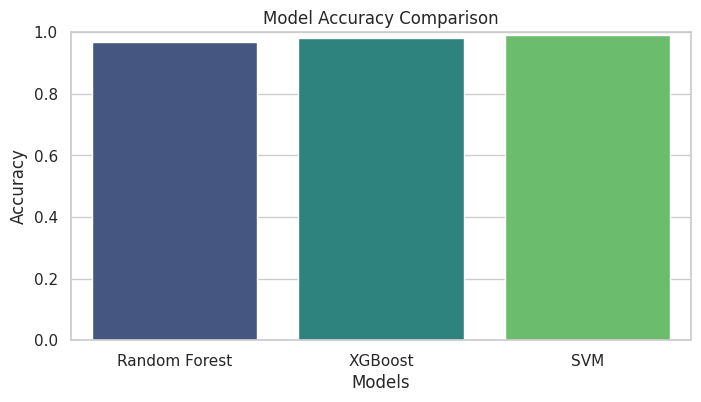

In [ ]:


# Create a dictionary to store model performance
results = {
    "Model": ["Random Forest", "XGBoost", "SVM"],
    "Accuracy": [accuracy_rf, accuracy_xgb, accuracy_svm]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the comparison table
print("Comparison Table of Model Performance:")
print(results_df)

# To display as a table in Colab
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)  # Adjusting scale to show percentages
plt.show()


In [ ]:

# Load GLCM and ResNet features
glcm_features = np.load("/content/drive/My Drive/dataset_folder/glcm_features/all_glcm_features.npy")
resnet_features = np.load("/content/drive/My Drive/dataset_folder/preprocessed_data/resnet_features.npy")
#kmeans_labels = np.load("/content/drive/My Drive/dataset_folder/agglo_cluster_labels.npy")
kmeans_labels = cluster_labels
# Step 1: Combine GLCM and ResNet features
combined_features = np.hstack((glcm_features, resnet_features))
print(f"Combined features shape: {combined_features.shape}")

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, kmeans_labels, test_size=0.2, random_state=42)

# Step 3: Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy on Combined Features: {accuracy_rf:.2f}")
print("Classification Report for Random Forest on Combined Features:")
print(classification_report(y_test, y_pred_rf))

# Step 5: Train and evaluate XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy on Combined Features: {accuracy_xgb:.2f}")
print("Classification Report for XGBoost on Combined Features:")
print(classification_report(y_test, y_pred_xgb))

# Step 6: Train and evaluate SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy on Combined Features: {accuracy_svm:.2f}")
print("Classification Report for SVM on Combined Features:")
print(classification_report(y_test, y_pred_svm))


Combined features shape: (19261, 2053)
Random Forest Accuracy on Combined Features: 0.78
Classification Report for Random Forest on Combined Features:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       572
           1       0.82      0.75      0.78       826
           2       0.84      0.74      0.78       577
           3       0.72      0.82      0.77       995
           4       0.76      0.82      0.79       883

    accuracy                           0.78      3853
   macro avg       0.80      0.78      0.79      3853
weighted avg       0.79      0.78      0.78      3853



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:37:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy on Combined Features: 0.80
Classification Report for XGBoost on Combined Features:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       572
           1       0.79      0.76      0.78       826
           2       0.82      0.80      0.81       577
           3       0.76      0.81      0.78       995
           4       0.79      0.83      0.81       883

    accuracy                           0.80      3853
   macro avg       0.80      0.79      0.80      3853
weighted avg       0.80      0.80      0.80      3853

SVM Accuracy on Combined Features: 0.81
Classification Report for SVM on Combined Features:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       572
           1       0.81      0.76      0.78       826
           2       0.78      0.86      0.82       577
           3       0.83      0.77      0.80       995
           4       0.78      0.83      0.81     